#Union del codigo de modelos y calculo de metricas
#Equipo 51

In [36]:
#Cargamos las diferentes librerias
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer

##Inicio: Nuestras funciones


In [8]:
#Función que permite determinar las diferentes metricas de los modelos de clasificación
#utilizando los datos provenientes de las matriz de la matriz de confusión.
#la función requiere las predicciones del modelos,  y los datos reales. 
def metricas(yreal, ypred):

#Utilizamos la funcion "confusion_matriz", para obtener los verdaderos, positivos y negativos
#lo mismo con los falsos, positivos y negativos.
 tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()

#Calculo de la metrica de exactitud 
 accuracy  = (tp+tn)/(tp+tn+fp+fn)
#Calculo de la metrica de precision
 precision = tp/(tp+fp)
#Calculo de la metrica de recall
 recall    = tp/(tp+fn)
#Calculo de la metrica f1score 
 f1score   = 2*((precision*recall)/(precision+recall))
#Calculo de la metrica gmen, para esta se requiere la metrica de especificidad
 specificity= tn/(tn+fp)
#Ahora si el calculo de gmena
 gmean     = math.sqrt(recall*specificity)

 return accuracy, precision, recall, f1score, gmean


In [45]:
def mi_accuracy(yreal, ypred):

#Utilizamos la funcion "confusion_matriz", para obtener los verdaderos, positivos y negativos
#lo mismo con los falsos, positivos y negativos.
 tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()

#Calculo de la metrica de exactitud 
 accuracy  = tp/(tp+fp)
 return accuracy

In [44]:
def mi_precision(yreal, ypred):

#Utilizamos la funcion "confusion_matriz", para obtener los verdaderos, positivos y negativos
#lo mismo con los falsos, positivos y negativos.
 tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()

#Calculo de la metrica de exactitud 
 precision  = (tp+tn)/(tp+tn+fp+fn)
 return precision

In [46]:
def mi_recall(yreal, ypred):

#Utilizamos la funcion "confusion_matriz", para obtener los verdaderos, positivos y negativos
#lo mismo con los falsos, positivos y negativos.
 tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()

#Calculo de la metrica de exactitud 
 recall  = tp/(tp+fn)
 return recall

In [47]:
def mi_f1score(yreal, ypred):

#Utilizamos la funcion "confusion_matriz", para obtener los verdaderos, positivos y negativos
#lo mismo con los falsos, positivos y negativos.
 tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()

#Calculo de la metrica de precision
 precision = tp/(tp+fp)
#Calculo de la metrica de recall
 recall    = tp/(tp+fn)
#Calculo de la metrica f1score 
 f1score   = 2*((precision*recall)/(precision+recall))
 return f1score

In [50]:
def mi_gmean(yreal, ypred):

#Utilizamos la funcion "confusion_matriz", para obtener los verdaderos, positivos y negativos
#lo mismo con los falsos, positivos y negativos.
 tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()

#Calculo de la metrica de recall
 recall    = tp/(tp+fn)
#Calculo de la metrica gmen, para esta se requiere la metrica de especificidad
 specificity= tn/(tn+fp)
#Ahora si el calculo de gmena
 gmean     = math.sqrt(recall*specificity)
 return gmean

In [29]:
#Funcion que permite llamar los diferentes modelos de aprendizaje automatico a entrenar
#los modelos que se van a entrenar son : Regresion Logistica, Arboles de Decision y Bosque Aleatorio
def get_models():
  modelos = list()
  nombres = list()

#LR - Modelo de Regresion Logistica
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

#DT - Modelo de Arbol de Decision
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

#RF - Modelo de Bosque Aleatorio
  modelos.append(RandomForestClassifier(n_estimators=50))
  nombres.append('RF')
 
  return modelos, nombres

##Fin: Nuestras Funciones


#Cargamos los datos de prueba para entrenar los modelos y poner a prueba las funciones

In [ ]:
#Cargamos los datos de prueba, estos datos se deben de modificar por los datos que vamos a utilizar.
mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

data = pd.read_csv(mypath, sep=" ", header=None)

data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']

print(data.shape)
data.head()

In [3]:
data['A4'] = data['A4'].map({2:2, 1:0, 3:0})
data['A5'] = data['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
data['A6'] = data['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})

In [4]:
# Ahora sí, definamos nuestras variables de entrada y de salida, observa que ambas son DataFrames de Pandas:

X = data.iloc[:,:-1]  

Y = data.iloc[:,-1]     # También puede ser: data[['class']]     

In [5]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(552, 14) : dimensión de datos de entrada para entrenamiento y validación
(138, 14) : dimensión de datos de entrada para prueba
(552,) : dimensión de variable de salida para entrenamiento y validación
(138,) : dimensión de variable de salida para prueba


In [40]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#En este punto los datos ya quedaron preprocesados y cargados. 
#Aqui inicia el entrenamiento de los modelos y la prueba de las diferentes funciones que creamos 

In [84]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
  mis_metricas ={'mi_accuracy':make_scorer(mi_accuracy),
                 'mi_precision':make_scorer(mi_precision),
                 'mi_recall':make_scorer(mi_recall),
                 'mi_f1score':make_scorer(mi_f1score),
                 'mi_gmean':make_scorer(mi_gmean)}
  scores = cross_validate(pipeline, Xtv, np.ravel(ytv), scoring= mis_metricas, cv=cv)
  resultados.append(scores)
  print('%s:\nAccuracy: %.3f\nPrecision: %.3f\nRecall: %.3f\nF1-Score: %.3f\nGmean: %.3f\n' % (nombres[i],
                                                                          np.mean(scores['test_mi_accuracy']),
                                                                          np.mean(scores['test_mi_precision']),
                                                                          np.mean(scores['test_mi_recall']),
                                                                          np.mean(scores['test_mi_f1score']),
                                                                          np.mean(scores['test_mi_gmean']),
                                                                          ))




LR:
Accuracy: 0.825
Precision: 0.863
Recall: 0.884
F1-Score: 0.852
Gmean: 0.864

DT:
Accuracy: 0.785
Precision: 0.810
Recall: 0.798
F1-Score: 0.788
Gmean: 0.806

RF:
Accuracy: 0.865
Precision: 0.870
Recall: 0.841
F1-Score: 0.852
Gmean: 0.866



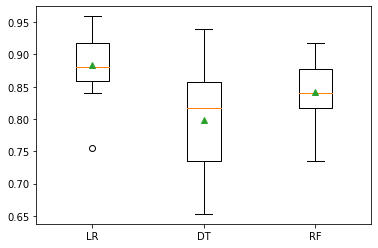

In [87]:
bpRecall = list()
for i in range(len(resultados)):
  Recall_metric = resultados[i]['test_mi_recall']
  bpRecall.append(Recall_metric)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

#Saludos, les comento que al parecer, ya quedo parte del punto del inciso a al d.Lo unico que se cambia en este codigo son los datos de entrada la parte del entrenamiento al parecer ya quedo, si gustar revisarlo y comentar adelante. El día de mañana continuo con el inciso e.